In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_kraken = pd.read_csv('data/bitcoin-kraken-5day-minute.csv', index_col = 'Timestamp unix')
data_kraken = data_kraken.drop(columns = ['Unnamed: 9', 'Unnamed: 10'])
data_kraken.head()

,Timestamp,open,high,low,close,Volume (BTC),Volume (Currency),Weighted_Price
Timestamp unix,,,,,,,,
43905.00000,15/03/2020 0:00,5163.1,5182.5,5161.1,5181.4,18.5,95732.97,5175.2
43905.00069,15/03/2020 0:01,5181.3,5181.3,5155.2,5165.3,1.44,7428.13,5161.21
43905.00139,15/03/2020 0:02,5164.6,5164.6,5092.6,5108.6,13.38,68572.67,5125.13
43905.00208,15/03/2020 0:03,5107.5,5112.8,5101.6,5105.9,12.52,63908.45,5106.44
43905.00278,15/03/2020 0:04,5105.8,5119.9,5105.8,5114.9,7.63,39018.71,5116.24


In [3]:
data_kraken = data_kraken.sort_index()
data_kraken

,Timestamp,open,high,low,close,Volume (BTC),Volume (Currency),Weighted_Price
Timestamp unix,,,,,,,,
43901.00000,11/03/2020 0:00,7889.6,7889.6,7886.6,7886.6,0.09,675.7,7888.58
43901.00069,11/03/2020 0:01,7884.8,7884.8,7870,7870,36.95,290927.8,7873.7
43901.00139,11/03/2020 0:02,7870.3,7872,7865,7870.7,3.33,26182.39,7869.54
43901.00208,11/03/2020 0:03,7875,7875.1,7874.2,7875.1,1.9,14924.35,7874.81
43901.00278,11/03/2020 0:04,7876.1,7882.4,7876.1,7882.4,2.64,20768.79,7879.93
...,...,...,...,...,...,...,...,...
43906.99722,16/03/2020 23:56,5018.6,5028.5,5017.4,5028.2,0.27,1353.55,5026.01
43906.99792,16/03/2020 23:57,5028.7,5042.9,5028.7,5033.1,22.28,112191.66,5036.61
43906.99861,16/03/2020 23:58,5036.7,5036.9,5030,5030,1.58,7929.06,5032.63


In [4]:
data_kraken.index = data_kraken.index.astype('str')
data_kraken.index

Index(['43901.0', '43901.00069', '43901.00139', '43901.00208', '43901.00278',
       '43901.003469999996', '43901.00417', '43901.00486',
       '43901.005560000005', '43901.00625',
       ...
       '43906.99375', '43906.994439999995', '43906.99514', '43906.99583',
       '43906.996530000004', '43906.99722', '43906.99792', '43906.99861',
       '43906.99931', '43907.0'],
      dtype='object', name='Timestamp unix', length=11524)

In [5]:
data_kraken = data_kraken.replace('—',np.NaN)
data_kraken.Weighted_Price.describe()

count     11366
unique     8197
top        5185
freq          5
Name: Weighted_Price, dtype: object

In [6]:
data_kraken.loc[:,'open':]

,open,high,low,close,Volume (BTC),Volume (Currency),Weighted_Price
Timestamp unix,,,,,,,
43901.0,7889.6,7889.6,7886.6,7886.6,0.09,675.7,7888.58
43901.00069,7884.8,7884.8,7870,7870,36.95,290927.8,7873.7
43901.00139,7870.3,7872,7865,7870.7,3.33,26182.39,7869.54
43901.00208,7875,7875.1,7874.2,7875.1,1.9,14924.35,7874.81
43901.00278,7876.1,7882.4,7876.1,7882.4,2.64,20768.79,7879.93
...,...,...,...,...,...,...,...
43906.99722,5018.6,5028.5,5017.4,5028.2,0.27,1353.55,5026.01
43906.99792,5028.7,5042.9,5028.7,5033.1,22.28,112191.66,5036.61
43906.99861,5036.7,5036.9,5030,5030,1.58,7929.06,5032.63


In [8]:
#data_kraken.Weighted_Price = pd.to_numeric(data_kraken['Weighted_Price'])
data_kraken.loc[:,'open':] = data_kraken.loc[:,'open':].astype('float64')
data_kraken.dtypes

Timestamp             object
open                 float64
high                 float64
low                  float64
close                float64
Volume (BTC)         float64
Volume (Currency)    float64
Weighted_Price       float64
dtype: object

In [9]:
data_kraken = data_kraken.drop_duplicates()

In [15]:
#data_kraken[data_kraken['Weighted_Price'] == np.NaN]
data_kraken[data_kraken['Timestamp'] >= '11/03/2020 0:28'][data_kraken['Timestamp'] <= '11/03/2020 0:30'].interpolate(method='linear')

/Users/edwinagnew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Timestamp,open,high,low,close,Volume (BTC),Volume (Currency),Weighted_Price
Timestamp unix,,,,,,,,
43901.01944,11/03/2020 0:28,7946.70,7946.80,7945.5,7945.5,3.41,27077.520,7946.450
43901.02014,11/03/2020 0:29,7945.35,7948.25,7944.4,7947.6,1.93,15344.675,7945.495
43901.02083,11/03/2020 0:30,7944.00,7949.70,7943.3,7949.7,0.45,3611.830,7944.540


In [16]:
data_kraken = data_kraken.interpolate(method='linear')

In [17]:
data_kraken['Weighted_Price'].describe()

count    8641.000000
mean     5917.587501
std      1088.640410
min      3948.630000
25%      5228.330000
50%      5415.680000
75%      6138.830000
max      7983.030000
Name: Weighted_Price, dtype: float64

In [18]:
data_kraken[data_kraken['Timestamp'] == "16/03/2020 20:05"]

,Timestamp,open,high,low,close,Volume (BTC),Volume (Currency),Weighted_Price
Timestamp unix,,,,,,,,
43906.83681,16/03/2020 20:05,4993.7,4999.5,4944.7,4949.6,10.93,54300.37,4970.17


In [19]:
data_kraken.to_csv('data/kraken_cleaned.csv')

In [21]:
data_kraken['Weighted_Price'].describe()

count    8641.000000
mean     5917.587501
std      1088.640410
min      3948.630000
25%      5228.330000
50%      5415.680000
75%      6138.830000
max      7983.030000
Name: Weighted_Price, dtype: float64

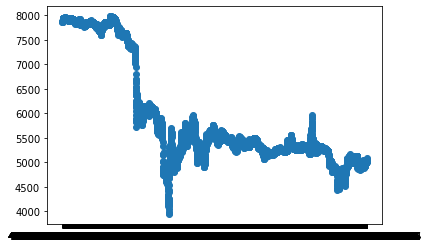

In [23]:
plt.scatter(data_kraken.index, data_kraken['Weighted_Price'])
plt.show()